In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(64, 128) * 0.01
    b2 = np.zeros((64, 1))
    W3 = np.random.randn(10, 64) * 0.01
    b3 = np.zeros((10, 1))
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_decent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A3)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration: {i} Accuracy: {acc}")
    
    return W1, b1, W2, b2, W3, b3

In [7]:
W1, b1, W2, b2, W3, b3 = gradient_decent(X_train, Y_train, alpha=0.2, iterations=500)


[8 8 8 ... 4 1 8] [2 6 3 ... 8 6 0]
Iteration: 0 Accuracy: 0.10626829268292683
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 10 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 20 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 30 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 40 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 50 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 60 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 70 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 80 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 90 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 100 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Iteration: 110 Accuracy: 0.11190243902439025
[1 1 1 ... 1 1 1] [2 6 3 ... 8 6 0]
Ite

In [8]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    return get_predictions(A3)

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    plt.imshow(current_image.reshape(28, 28) * 255, cmap='gray')
    plt.show()
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


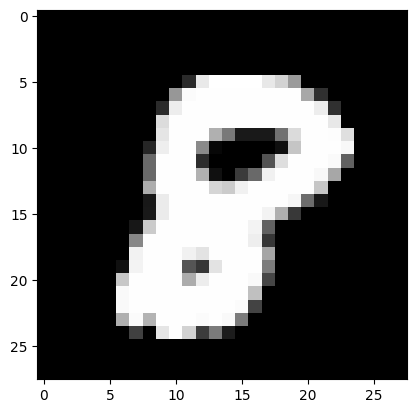

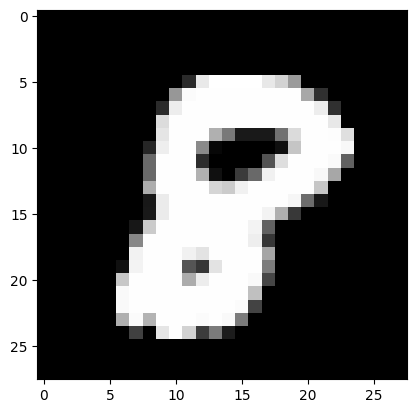

In [9]:
test_prediction(197, W1, b1, W2, b2, W3, b3)